# Tic Tac Toe Game

- Tic Tac Toe, known colloquially as 'Xs ad Os', is a 2 player game typically played on a 3X3 grid. The objective is simple: be the first to form a horizontal, vertical or diagonal line of three of our marks (either 'X' or 'O'). The elegance of the game lies in its deceptive complexity, while the rules are straightforward, devising an unbeatable strategy demands a keen understanding of the game's dynamics.

## Rule of the game:
- Setup: The game is played on a 3X3 grid. One player uses 'X' another player uses 'O' and each player takes turns making their moves.
- Winner: The game is won by the player placing his or her symbol in a row, column, or diagonal. The 1st player to get three symbols in a row wins the game. When the player reaches this, the game ends immediately.
- Draw: If all the grid cells are filled and no player has 3 symbols in a row, the game will be tie or a draw.
- Illegal Moves: A player cannot place his or her symbol on tile occupied by an opponent's symbol or their own symbol. The move must be made to an empty cell.

## Interview Setting
#### Point 1: Introduction an Vague Problem Statement
- Interviewer: Let's start with a basic problem statement. Design a Tic Tac Toe game system.
- Candidate: Let me outline the flow of the game based on my understanding of the Tic Tac Toe game:
    - We have a standard 3x3 grid.
    - Two players take turns marking the space on the grid with 'X' and 'O'.
    - The game continues until one player gets three of their marks in a row (horizontal, vertical, or diagonal), or the grid is filled resulting in a draw.
    - Is this the kind og game you had in mind.
- Interviewer: Yes, you are in-line with the flow. Please continue ahead.
- Candidate: Sure, I'd like to clarify a few requirements to ensure we're on the same page
    - Are we focusing on a standard 3x3 board?
    - Will this be a 2-player human game?
    - What are the core requirements?
#### Part 2: Clarifying requirements
- Interviewer: We want a simple system that:
    - Supports a standard 3x3 Tic Tac Toe game.
    - Allows 2 human players to play.
    - Provides move validation.
    - Detects win or draw conditions.
- Candidate: To ensure we're on the same page, let me write down the key requirements:
    - A 3x3 game board
    - Two human players
    - Altering turns b/w 'X' and 'O'
    - Detection of win or draw scenarios.
#### Point 3: Identify key components
- Candidate: Now that we have the requirements clarified, let's identify the key components of our Tic Tac Toe system:
1. Piece: Represents 'X' and 'O'
    - Enum: Symbol
    - Description: This enum represents the 2 possible pieces in the game: 'X' and 'O', as well as an empty cell.

In [1]:
from enum import Enum

class Symbol(Enum):
    X = 'X'
    O = 'O'
    EMPTY = 'EMPTY'

2. Board: The 3x3 grid where the game is played.
    - Class: Board
    - Description: This class represents the game board, which can be of any size. It includes methods for validating moves, making moves, and checking the game state.

In [ ]:
class Board:
    

3. Player: Each player (either X or O) taking turns.
    - Class: Player
    - Descrption: This class represents the player in the game, it stores the plaeyr's symbol and strategy for making moves

In [8]:
class Player:
    def __init__(self, symbol: Symbol, playerStrategy: PlayerStrategy):
        self.symbol = symbol
        self.playerStrategy = playerStrategy

    def getSymbol(self) -> Symbol:
        return self.symbol

    def getPlayerStrategy(self):
        return self.playerStrategy

4. Position: Represents the row and column coordinates on the board
    - Class: Position
    - Description: This class encapsulates the position on the board. It is used to represent the location of a move and supports equality checks and readable formatting.

In [4]:
class Position:
    def __init__(self, row: int, col: int):
        self.row = row
        self.col = col

    def __str__(self):
        return f"({self.row}, {self.col})"

    def equals(self, obj) -> bool:
        if self is obj:
            return True

        if not isinstance(obj, Position):
            return False

        return self.row == obj.row and self.col == obj.col

    def hashCode(self):
        return 31 * self.row + self.col

- Interviewer: That sounds good. Let's proced with the design details for these components.

#### Point 4: Design Challenges
- Interviewer: What design challenges do we anticipate?
- Candidate: The key challenges for the Tic Tac Toe game will include:
    - Managing Game State: Ensuring the system accurately reflects the current state of the game, including player turns and board status.
    - Implementing Move Validation: Verifying that each move is legal and  within the rules of the game.
    - Tracking Player Turns: Ensuring that players alternate turns correctly between 'X' and 'O'
    - Detecting Game-Ending Conditions: Accurately identifying win or draw scenarios to conclude the game appropriately.

#### Point 5: Approach
- Interviewer: How would we approach these challenges to ensure our game doesn't break?
- Candidate: To tackle the design challenges, I propose utilizing design patterns effectively. Here are the strategies which I a considering along with the examples:
    1. Strategy Pattern for Player interactions:
        - Define a consistent Player interface: Implement a common interface for players, ensuring consistent interactions.
        - Allow Flexible Player Move implementations: Enable different move strategies (e.g., random move for an AI player, user input for a human player).
        - Example: A player interface with a makeMove() method that can be implemented differently for human and AI players.
    2. State Pattern for Game Flow Management:
        - Manage different Game States: Clearly define states such as in-progress, won, and draw.
        - Handle State Transitions Systematically: Ensure smooth transitions between states, like moving from in-progress to a win state.
        - Example: A GameState class with methods to transition b/w statees based on game conditions.
    3. Observer Pattern for Game Event Tracking
        - Notify Listeners about Game State Changes: Allow components to listen for and react to game state changes.
        - Support Potential Future Extensions: Facilitate extensions like logging notifications or UI updates.
        - Example: A GameEventListener that gets notified when a player makes a move, or the game state changes.
    4. Factory Pattern for Player Creation
        - Create Players with consistent interfaces: Use a factory to instantiate player objects. Ensuring they adhere to the player interface.
        - Enable Easy Addition of Player Types: Allow for the seamless addition of new player types without modifying exisiting code.
        - Example: A PlayerFactory that creates instances of human or AI players based on configuration.
- Interviewer: that sounds like a solid approach. Let's dive into the design details for these patterns and components.

##### Note:
** In most of the problems, Strategy and Factory Design pattern is common. Observer is also common. State is common.

#### Point 6: Implementation
- Interviwer: Ready to discuss implementation?
- Candidate: Yes, I'll focus on a simple, readable design that meets the code Tic Tac Toe requirements.
- 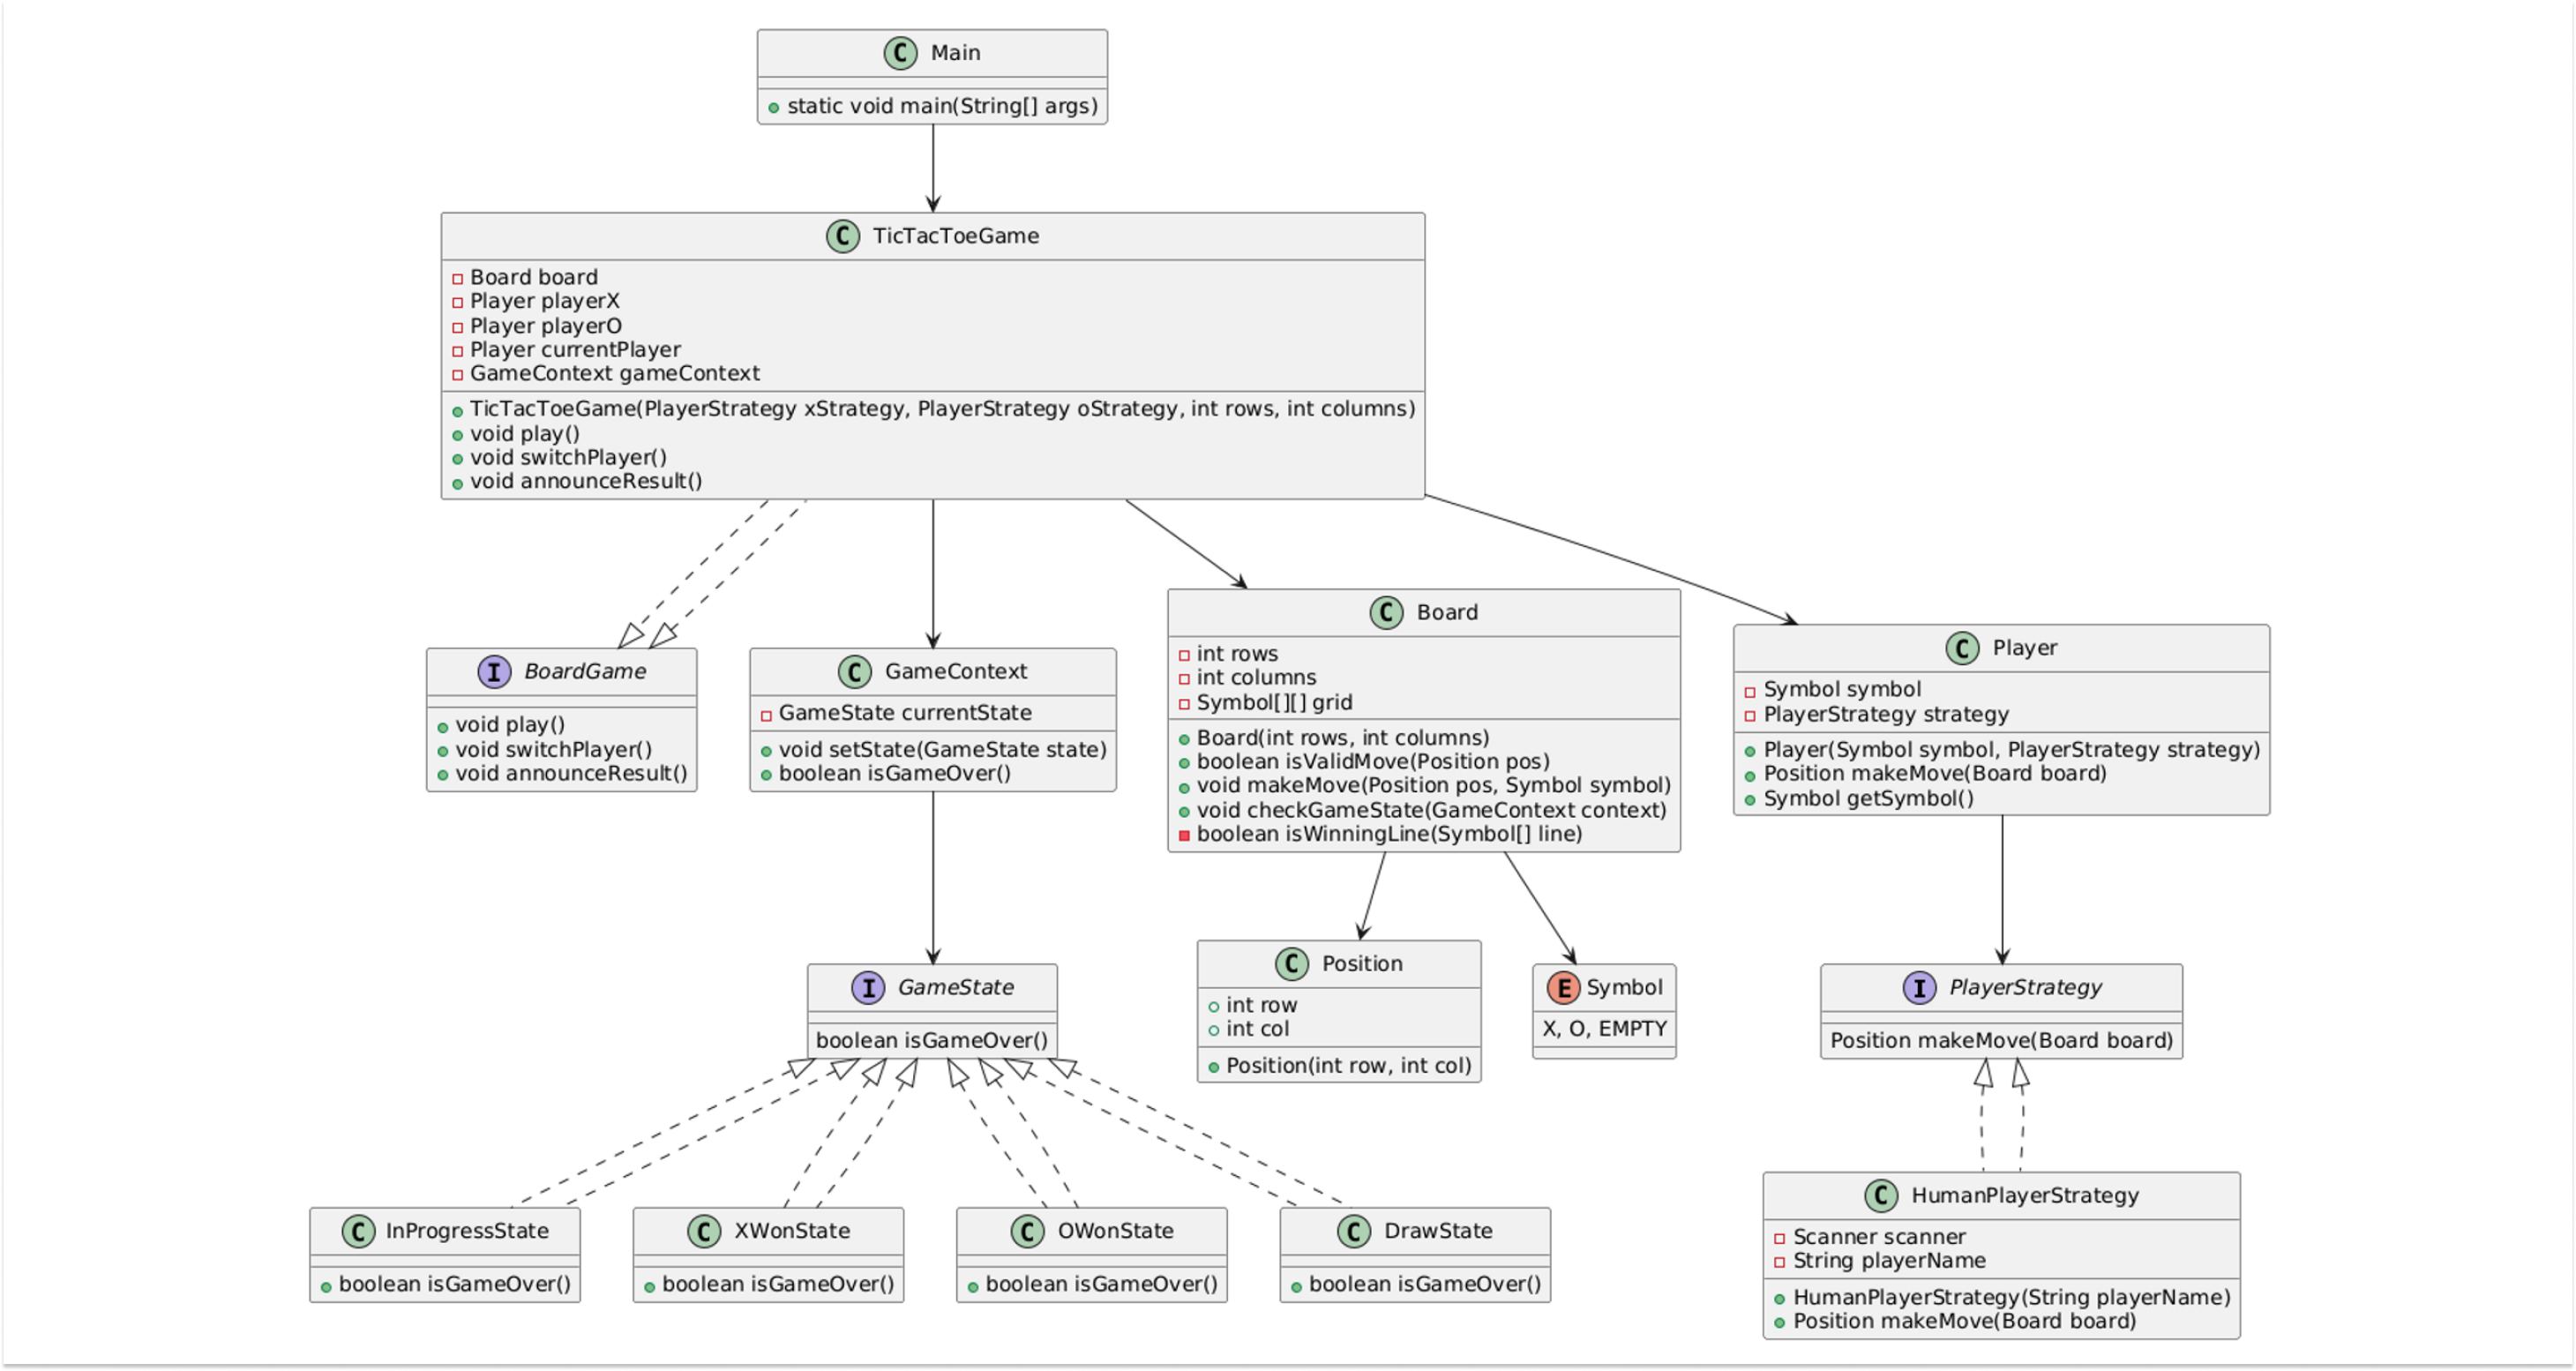

#### 1. Strategy Pattern: Player Move Strategies
- The Strategy Pattern allows defining a family of algorithms or strategies and making them interchangeable. In the context of player move strategies, the PlayerStrategy interface defines a method makeMove(Board board) that all concrete strategies must implement. This approach allows different player strategies, such as human or AI, to be used interchangeably without modifying the client code.

In [ ]:
from abc import ABC, abstractmethod

# Strategy interface for Player Moves
# Define a makeMove(Board board) method

class PlayerStrategy:
    @abstractmethod
    def makeMove(self, board: Board):
        pass

# Concrete Strategy for Human Player
class HumanPlayerStrategy(PlayerStrategy):
    def __init__(self, playerName: str):
        self.playerName = playerName

    def makeMove(self, board: Board):
        while True:
            try:
                print(f"{self.playerName}, enter your move (row [0-2] and column [0-2]:)", end="")
                # Input from human to enter their move
                row, col = map(int, input().split())

                move = Position(row, col)

                # Validates the player's input
                # If the move is valid, returns the position
                if board.isValidMove(move):
                    return move
                print("Invalid move. Try again.")
                
            except Exception:
                print("Invalid input. Please enter row and column as numbers.")

- Benefits of using the Strategy pattern:
    - Easily add new player strategies, such as AI or netwroked players.
    - No need to change the exisiting codebase.

#### 2. State Pattern: Game State Management
- The state pattern is a behavioral design pattern that allows an object to alter its behavior when its internal state changes. In the context of game state management, the GameState enum defines the various states a game can be in, such as IN_PROGRESS, X_WON, O_WON, and DRAW. Each state has ann associated boolean value indicating whether the game is over.

In [ ]:
from abc import ABC, abstractmethod

# GameState interface
class GameState:
    @abstractmethod
    def next(self, context: GameContext, player: Player, hasWon: bool):
        pass

    @abstractmethod
    def isGameOver(self):
        pass

# Concrete State: XTurnState
class XTurnState(GameState):
    def next(self, context: GameContext, player: Player, hasWon: bool):
        if hasWon:
            context.setState(XWonState() if player.getSymbol() == Symbol.X else OWonState())
        else:
            # Swithc to OTurnState
            context.setState(OTurnState())

    def isGameOver(self):
        return False
        

# Concrete State: OTurnState
class OTurnState(GameState):
    def next(self, context: GameContext, player: Player, hasWon: bool):
        if hasWon:
            context.setState(XWonState() if player.getSymbol() == Symbol.X else OWonState())
        else:
            context.setState(XTurnState())

    def isGameOver(self):
        return False

# Concrete State: XWonState
class XWonState(GameState):
    def next(self, context: GameContext, player: Player, hasWon: bool):
        # Game over, no next state
        pass

    def isGameOver(self):
        return True

# Concrete State: OWonState
class OWonState(GameState):
    def next(self, context: GameContext, player: Player, hasWon: bool):
        # Game over, no next state
        pass

    def isGameOver(self):
        return True
        
# Context Class
class GameContext:
    def __init__(self):
        self.currentState = XTurnState() # Start with X's turn

    def setState(self, state: GameState):
        self.currentState = state

    def next(self, player: Player, hasWon: bool):
        self.currentState.next(self, player, hasWon)

    def isGameOver(self):
        self.currentState.isGameOver()

    def getCurrentState(self):
        return self.currentState


### Board Representation
- The board class represents the game board for a Tic-Tac-Toe game and includes methods for validating moves, making moves, and checking the game state. The board is initialized as a grid with all positions set to sybmol.EMPTY

In [ ]:
# Board Representation

class Board:
    def __init__(self, rows: int, columns: int):
        self.rows = rows
        self.columns = columns
        self.grid = [[Symbol.EMPTY for j in range(columns)] for i in range(rows)]

    # Checks if a given position is within the bounds of the board.
    def isValidMove(self, pos: Position):
        row = pos.row
        col = pos.col

        return 0 <= row < self.rows and 0 <= col < self.columns and self.grid[row][col] == Symbol.EMPTY

    # Allows players to make their moves
    def makeMove(self, pos: Position, symbol: Symbol):
        self.grid[pos.row][pos.col] = symbol

    def isWinningLine(self, line):
        first: Symbol = line[0]
        for s in line:
            if s != first:
                return False
        return True
    
    # Determines the current state of the game by checking for
    # Rows, Columns, and Diagonals for winning conditions
    def checkGameState(self, context: GameContext):
        # Check rows
        for i in range(self.rows):
            if self.grid[i][0] != Symbol.EMPTY and self.isWinningLine(self.grid[i]):
                context.next(currentPlayer, True)
                return

        # Check columns
        for i in range(self.columns):
            column = [self.grid[j][i] for j in range(self.rows)]
            if column[0] != Symbol.EMPTY ad self.isWinningLine(column):
                context.next(currentPlayer, True)

        # Check Diagonals
        diagonal_len = min(self.rows, self.columns)
        diagonal1 = [self.grid[i][i] for i in range(diagonal_len)]
        diagonal2 = [self.grid[i][self.columns-1-i] for i in range(diagonal_len)]

        if diagonal1[0] != Symbol.EMPTY and self.isWinningLine(diagonal1):
            context.next(currentPlayer, True)
            return 
        
        if diagonal2[0] != Symbol.EMPTY and self.isWinningLine(diagonal2):
            context.next(currentPlayer, True)
            return


    # Print Board
    def printBoard(self):
        for i in range(self.rows):
            for j in range(self.columns):
                symbol = grid[i][j]
                if symbol == Symbol.X:
                    print('X', end='')
                elif symbol == Symbol.O:
                    print('O', end='')
                else:
                    print('.', end='')

                if j < self.columns - 1:
                    print('|', end='')

            print()

            if i < self.rows-1:
                print('---+---+---')
        print()
    

- 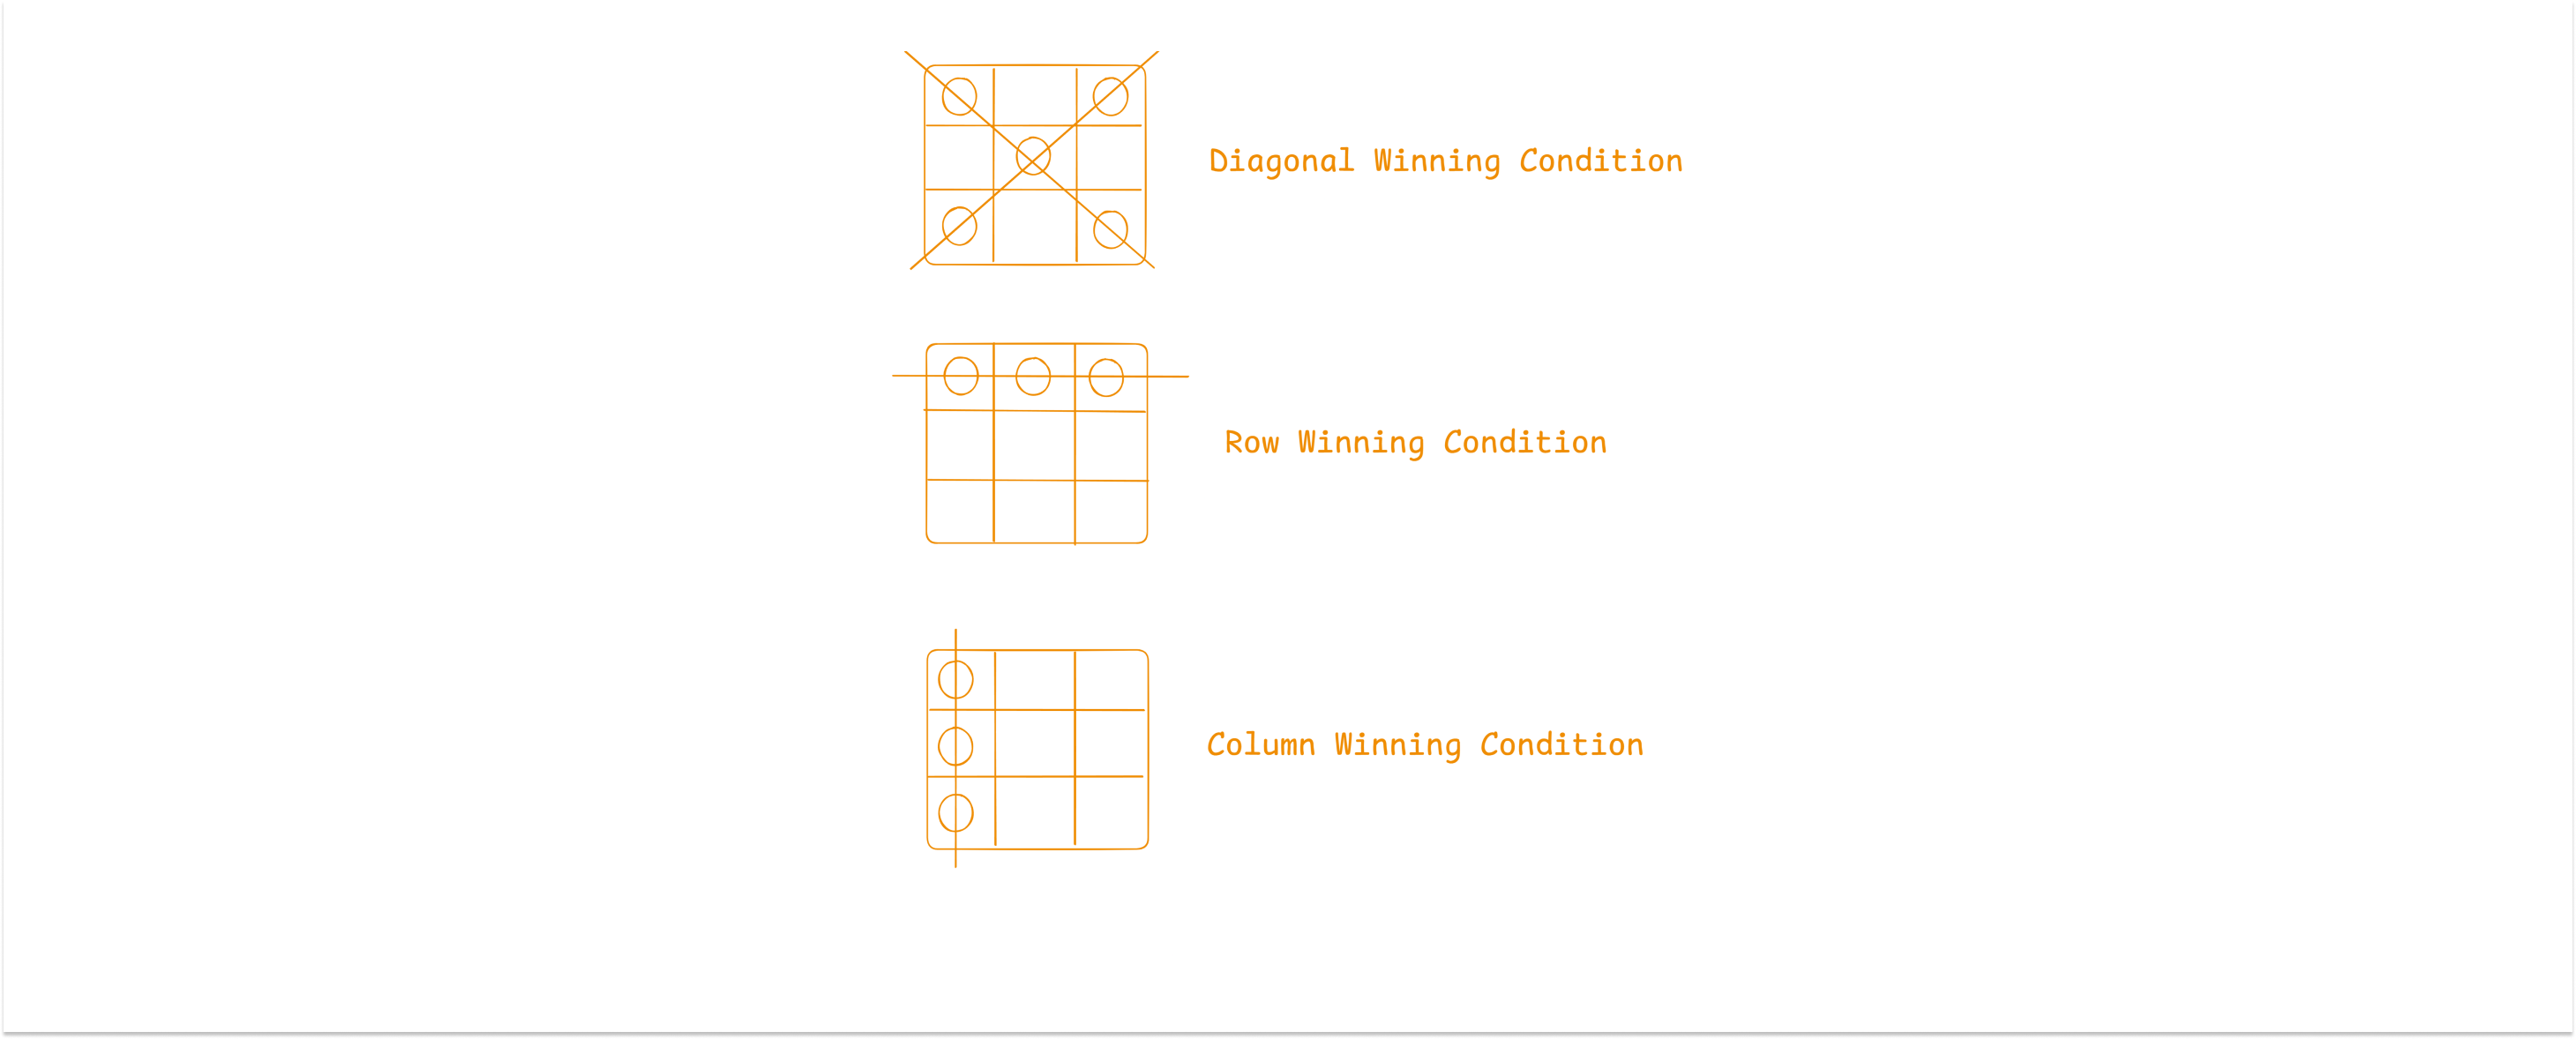
- Board Class Overview:
    1. Represents the game board for a Tic-Tac-Toe game
    2. Includes methods for:
        - Validationg moves
        - Making moves
        - Checking the game state
        - Initialized as a grid with all positions set to Symbol.EMPTY

### 3. Running the Game (Controller Pattern):

In [ ]:
from abc import ABC, abstractmethod

class BoardGames:
    @abstractmethod
    def play(self):
        pass

class TicTacToeGame(BoardGames):
    def __init__(self, xStrategy: PlayerStrategy, oStrategy: PlayerStrategy, rows: int, columns: int):
        self.board = Board(rows, columns)
        self.playerX = Player(Symbol.X, xStrategy)
        self.playerO = Player(Symbol.O, oStrategy)
        self.currentPlayer = self.playerX
        self.gameContext = GameContext()

    # Alternates the current player after each move.
    def switchPlayer(self):
        self.currentPlayer = self.playerO if (self.currentPlayer == self.playerX) else self.playerX

    # Display the outcome of the game based on the final game state.
    def annouceResult(self):
        state = self.gameContext.getCurrentState()
        if isinstance(state, XWonState):
            print("Player X wins!")
        elif isinstance(state, OWonState):
            print("Player O wins!")
        else:
            print("It's a draw!")
        
    # Loop continues until the game state indicates that the game is over.
    def play(self):
        while !self.gameContext.isGameOver():
            # Print the current state of the game
            self.board.printBoard()
            # Current
            self.board.checkGameState(self.gameContext)
            self.switchPlayer()
        self.annouceResult()

- TicTacToeGame Class Overview
    1. Manages the game flow using the Controller Pattern.
    2. Manages the game board, players, and the current player.
    3. Ensures smooth game progession.
- Encapsulation and Separation of Concerns.
    1. Encapsulates game flow logic within the TicTacToeGame class.
    2. Achievs a clear separation of concenrs.
    3. Makes the code more modular and maintainable.
    4. Allows for easy modifications and extensions, such as:
        - Adding new player statagies
        - Changing the game rules.
        - Without affecting the core game logic.

In [ ]:
if __name__ == '__main__':
    playerXStrategy = HumanPlayerStrategy('Player X')
    playerOStrategy = HumanPlayerStrategy('Player O')
    game = TicTacToeGame(playerXStrategy, playerOStrategy, 3, 3)
    game.play()

### Complete Code
- 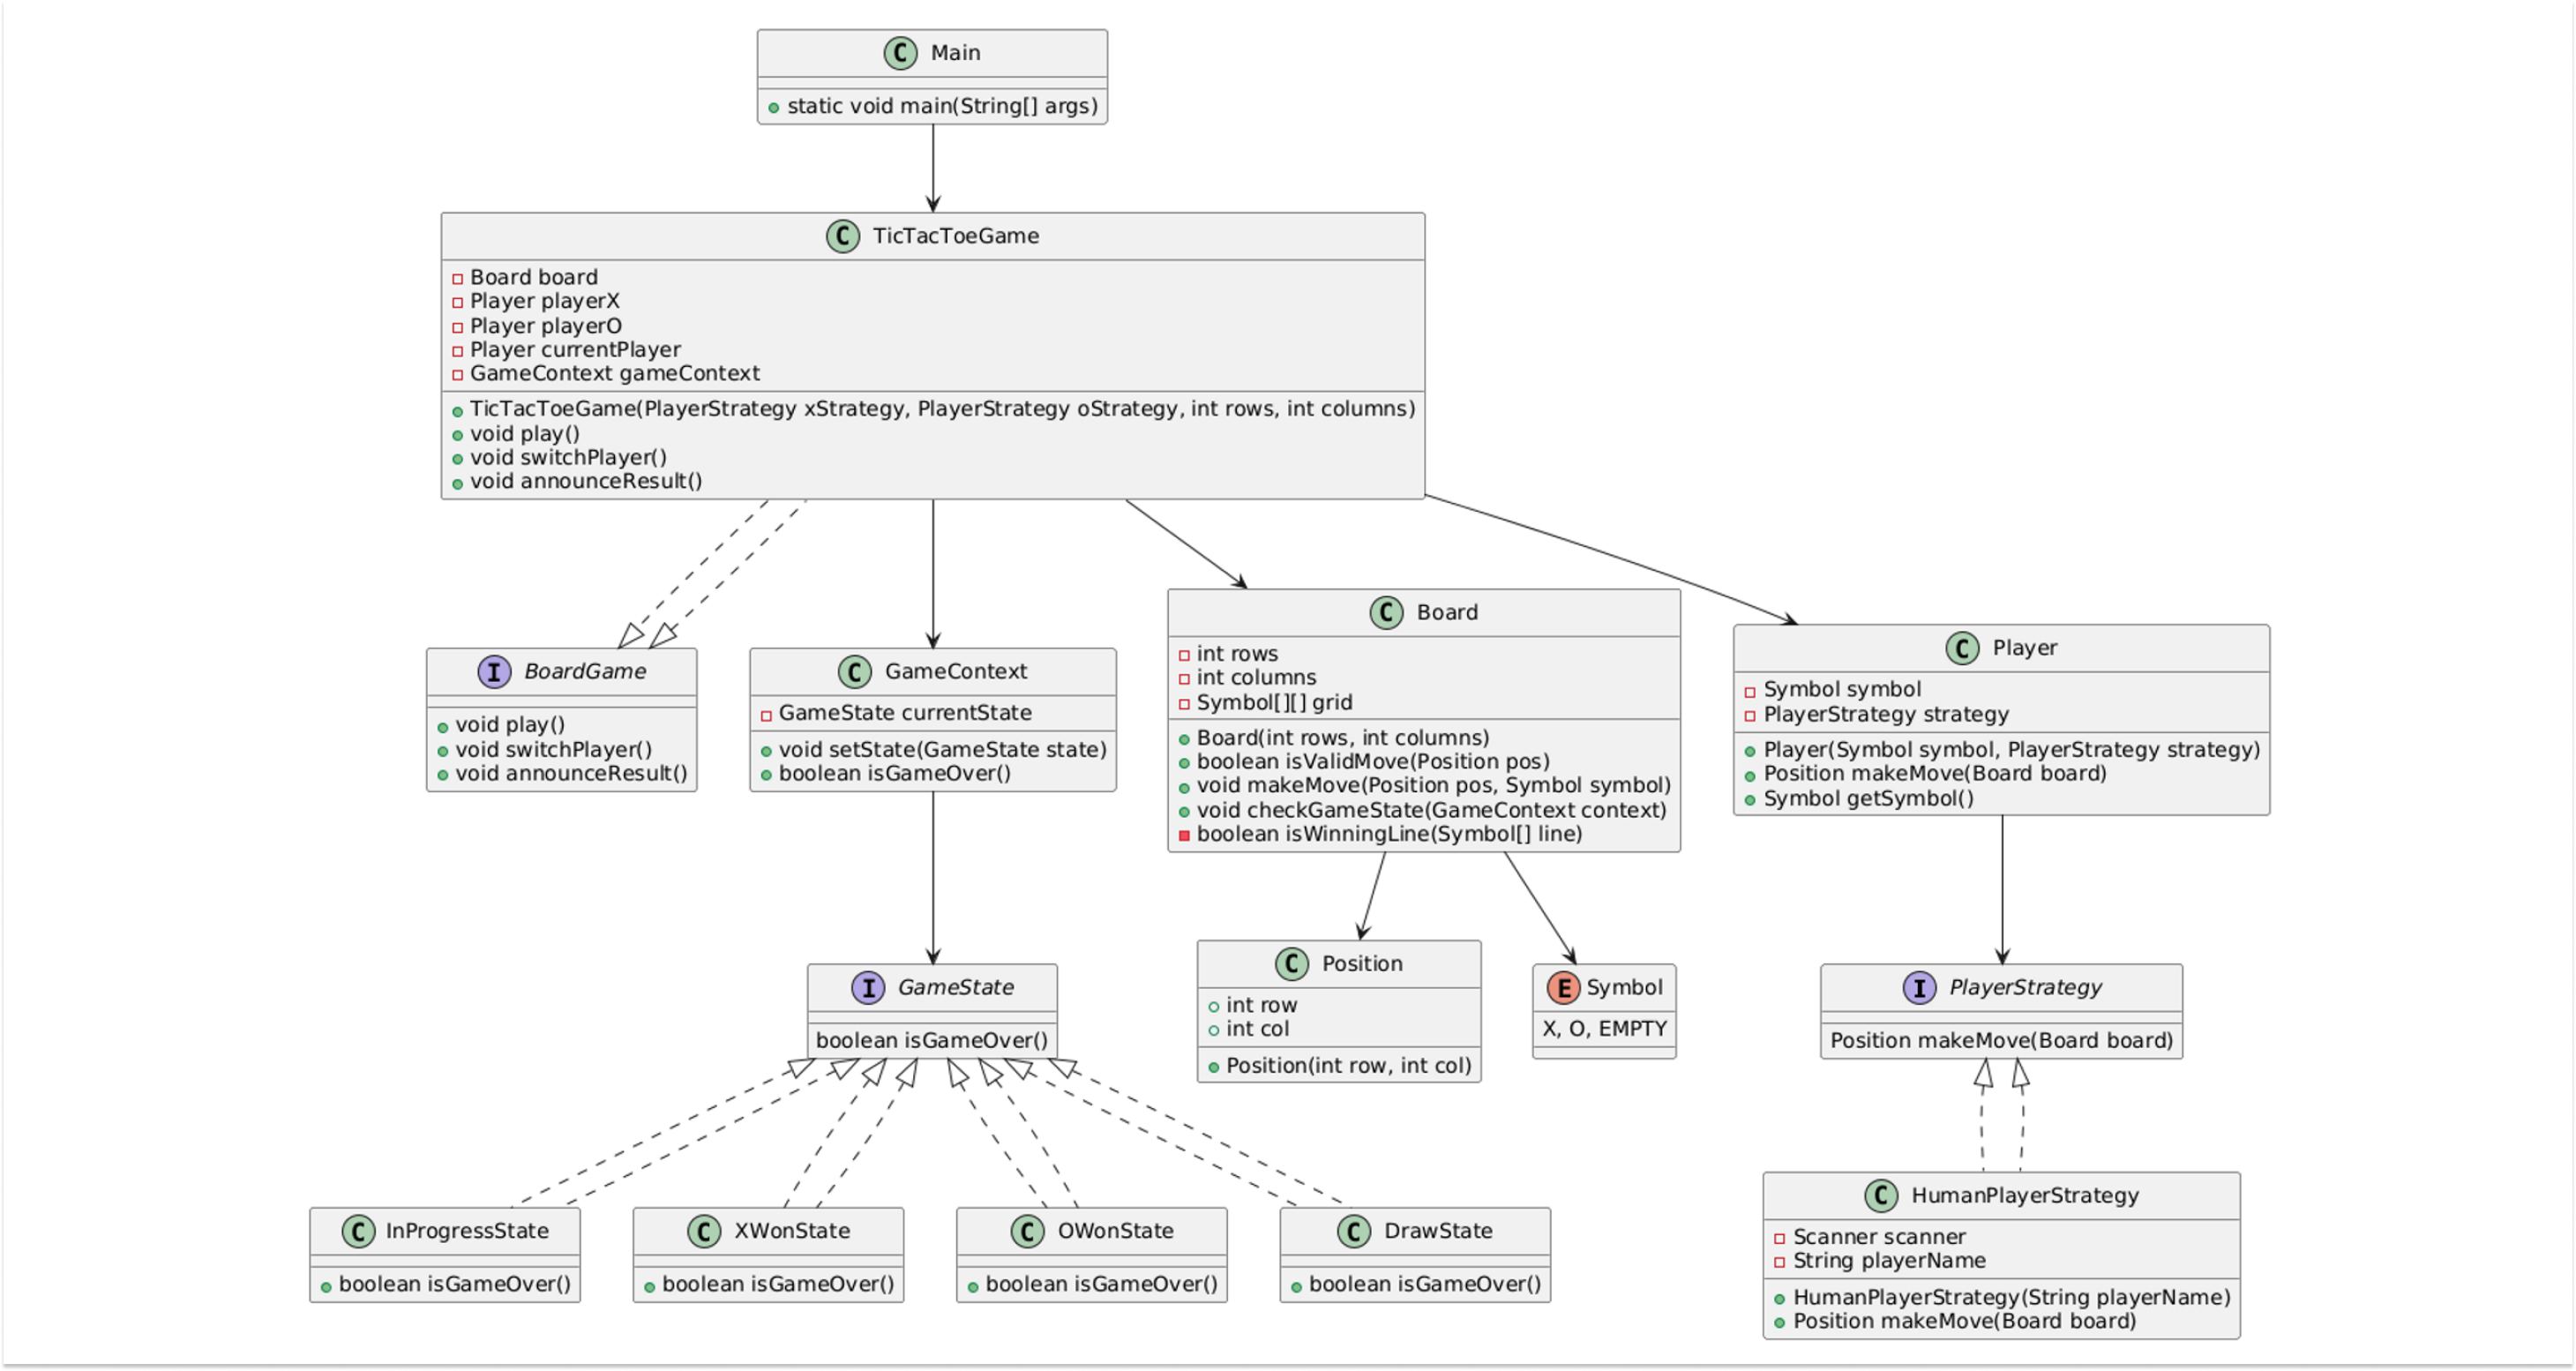

In [1]:
from abc import ABC, abstractmethod
from enum import Enum

In [2]:
class Symbol(Enum):
    X = 'X'
    O = 'O'
    EMPTY = 'EMPTY'

class Position:
    def __init__(self, row, col):
        self.row = row
        self.col = col

    def __str__(self):
        print(f'({self.row}, {self.col})')

In [3]:
class PlayerStrategy(ABC):
    @abstractmethod
    def makeMove(self, board):
        pass

class HumanPlayerStrategy(PlayerStrategy):
    def __init__(self, playerName):
        self.playerName = playerName

    def getName(self):
        return self.playerName

    def makeMove(self, board):
        while True:
            print(f"{self.playerName}, enter your move (row [0-2] and column [0-2]):")
            try:
                # Input from human to enter their move
                row, col = map(int, input().split())
                move = Position(row, col)
                # Validates the player's input
                # If the move is valid, return the position
                if board.isValidMove(move):
                    return move
                print("Invalid move. Try again.")
            except Exception as e:
                print("Invalid input. Please enter row and column as numbers.")

class Player:
    def __init__(self, symbol, strategy):
        self.symbol = symbol
        self.strategy = strategy

    def getSymbol(self):
        return self.symbol

    def getStrategy(self):
        return self.strategy

In [4]:
class GameState(ABC):
    @abstractmethod
    def next(self, context, player, hasWon: bool):
        pass
    @abstractmethod
    def isGameOver(self):
        pass

class XTurnState(GameState):
    def next(self, context, player, hasWon: bool):
        if hasWon:
            context.setState(XWonState() if player.getSymbol() == Symbol.X else OWonState())
        else:
            context.setState(OTurnState())    

    def isGameOver(self):
        return False

class OTurnState(GameState):
    def next(self, context, player, hasWon: bool):
        if hasWon:
            context.setState(OWonState() if player.getSymbol() == Symbol.O else XWonState())
        else:
            context.setState(XTurnState())

    def isGameOver(self):
        return False

class XWonState(GameState):
    def next(self, context, player, hasWon: bool):
        # Game over, no next state
        pass

    def isGameOver(self):
        return True

class OWonState(GameState):
    def next(self, context, player, hasWon: bool):
        # Game over, no next state
        pass

    def isGameOver(self):
        return True

class GameContext:
    def __init__(self):
        self.currentState = XTurnState() # Starts with X's turn

    def setState(self, state: GameState):
        self.currentState = state

    def next(self, player, hasWon: bool):
        self.currentState.next(self, player, hasWon)

    def isGameOver(self):
        return self.currentState.isGameOver()

    def getCurrentState(self):
        return self.currentState

In [5]:
class Board:
    def __init__(self, rows, columns):
        self.rows = rows
        self.columns = columns
        self.grid = [[Symbol.EMPTY for j in range(self.columns)] for i in range(self.rows)]

    def isWinningLine(self, line: list[Symbol]):
        first = line[0]
        for s in line:
            if s != first:
                return False
        return True

    def isValidMove(self, pos: Position):
        # print(pos)
        # print(0 <= pos.row < self.rows, 0 <= pos.col < self.columns, self.grid[pos.row][pos.col] == Symbol.Empty)
        return 0 <= pos.row < self.rows and 0 <= pos.col < self.columns and self.grid[pos.row][pos.col] == Symbol.EMPTY

    def placeMove(self, pos: Position, symbol: Symbol):
        self.grid[pos.row][pos.col] = symbol
        
    def checkGameState(self, context: GameContext):
        # Check rows
        for i in range(self.rows):
            if self.grid[i][0] != Symbol.EMPTY and self.isWinningLine(self.grid[i]):
                context.next(currentPlayer, True)
                return
                
        # Check columns
        for j in range(self.columns):
            column = [self.grid[j][i] for i in range(self.rows)]
            if column[0] != Symbol.EMPTY and self.isWinningLine(column):
                context.next(currentPlayer, True)
                return

        # Check Diagonals
        diagonal_len = min(self.rows, self.columns)
        diagonal1 = [self.grid[i][i] for i in range(diagonal_len)]
        diagonal2 = [self.grid[i][self.columns-1-i] for i in range(diagonal_len)]

        if diagonal1[0] != Symbol.EMPTY and self.isWinningLine(diagonal1):
            context.next(currentPlayer, True)
            return 
        
        if diagonal2[0] != Symbol.EMPTY and self.isWinningLine(diagonal2):
            context.next(currentPlayer, True)
            return

    def printBoard(self):
        for r in range(self.rows):
            row_display = []
            for c in range(self.columns):
                if self.grid[r][c] == Symbol.X:
                    row_display.append("X")
                elif self.grid[r][c] == Symbol.O:
                    row_display.append("O")
                else:
                    row_display.append(".")
            print(" | ".join(row_display))
            if r < self.rows - 1:
                print("--+---+--")
        print()
        

In [6]:
class BoardGame(ABC):
    @abstractmethod
    def play(self):
        pass
        
class TicTacToeGame:
    def __init__(self, xStrategy: PlayerStrategy, oStrategy: PlayerStrategy, rows: int, columns: int):
        self.board = Board(rows, columns)
        self.playerX = Player(Symbol.X, xStrategy)
        self.playerO = Player(Symbol.O, oStrategy)
        self.currentPlayer = self.playerX
        self.gameContext = GameContext()

    def switchPlayer(self):
        self.currentPlayer = self.playerX if self.currentPlayer == self.playerO else self.playerO

    def annouceResult(self):
        state = self.gameContext.getCurrentState()
        if isinstance(state, XWonState):
            print(f'Player X {self.playerX.getStrategy().getName()} wins!')
        elif isinstance(state, OWonState):
            print(f'Player O {self.playerO.getStrategy().getName()} wins!')
        else:
            print("It's a draw!")
    
    def play(self):
        while self.gameContext.isGameOver() != True:
            self.board.printBoard()
            move = self.currentPlayer.getStrategy().makeMove(self.board)
            self.board.placeMove(move, self.currentPlayer.getSymbol())
            # Check game state for win/draw
            self.board.checkGameState(self.gameContext)
            self.switchPlayer()
        self.annouceResult()
        

In [ ]:
if __name__ == '__main__':
    playerXStrategy = HumanPlayerStrategy('Player X')
    playerOStrategy = HumanPlayerStrategy('Player O')
    game = TicTacToeGame(playerXStrategy, playerOStrategy, 3, 3)
    game.play()

. | . | .
--+---+--
. | . | .
--+---+--
. | . | .

Player X, enter your move (row [0-2] and column [0-2]):


 1 2


. | . | .
--+---+--
. | . | X
--+---+--
. | . | .

Player O, enter your move (row [0-2] and column [0-2]):


 0 1


. | O | .
--+---+--
. | . | X
--+---+--
. | . | .

Player X, enter your move (row [0-2] and column [0-2]):


 0 2


. | O | X
--+---+--
. | . | X
--+---+--
. | . | .

Player O, enter your move (row [0-2] and column [0-2]):


 2 1


. | O | X
--+---+--
. | . | X
--+---+--
. | O | .

Player X, enter your move (row [0-2] and column [0-2]):


 2 2


. | O | X
--+---+--
. | . | X
--+---+--
. | O | X

Player O, enter your move (row [0-2] and column [0-2]):


 1 1


. | O | X
--+---+--
. | O | X
--+---+--
. | O | X

Player X, enter your move (row [0-2] and column [0-2]):


 exit


Invalid input. Please enter row and column as numbers.
Player X, enter your move (row [0-2] and column [0-2]):


- Interviewer: Sounds good. What makes your apprach effective?
- Candidate: The key strenghts of my approach:
    - Simplicity: The design is kept minimal and straightforward, avoiding unncessary complexity.
    - Clarity: It's easy to understand, which makes it accessible for developers to implement and maintain.
    - Efficiency: The implementation is direct and logical, ensuring smooth gameplay.
    - Separation of concerns: Each component has a clear responsibility, enchancing modularity and ease of updates.
    - Extensibility:
        - Support for differnt board sizes
        - Multiple players and symbols
        - Observer pattern for Game Event Tracking
        - Factory pattern for player Creation

### Support for different Board sizes
- 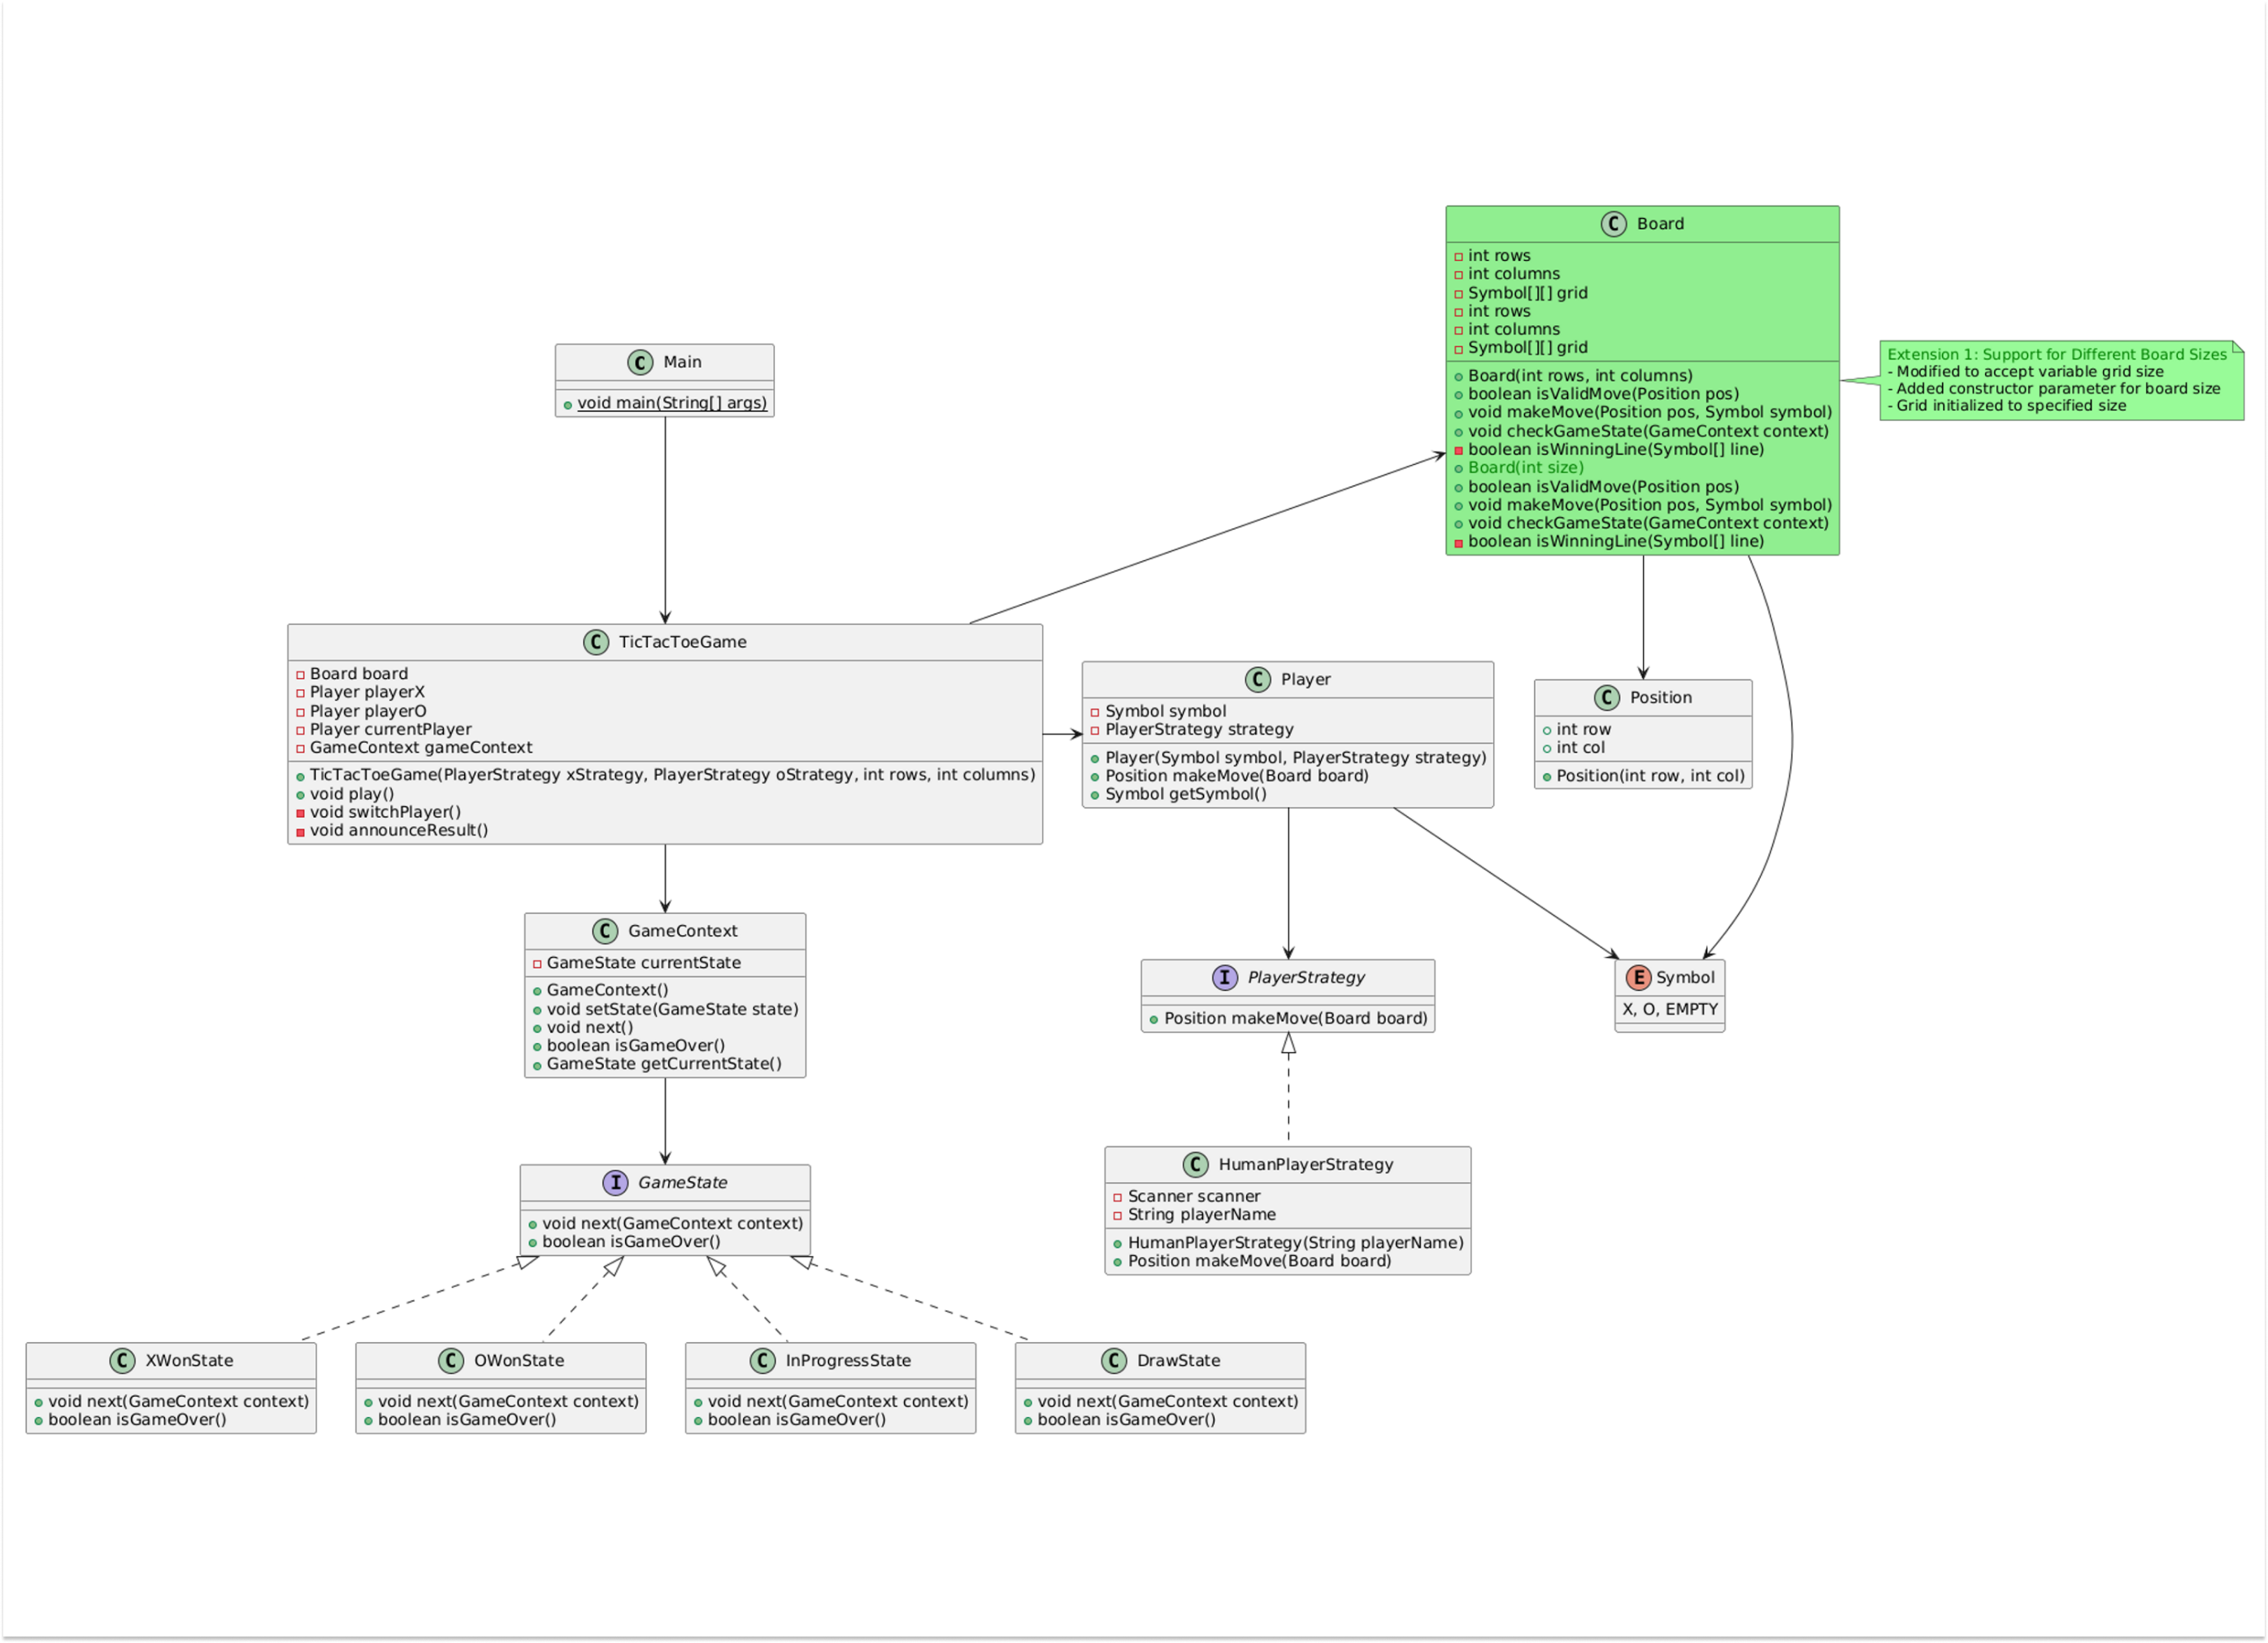
- To allow different board sizes, the Board class accepts a variable grid size.

### Multiple Players and Symbols
- Instead of restricting the game to just 2 players (X and O), the design can support multiple players, each with a unique symbol. The game class should accomondate a dynamic list of players and cycle through turns accordingly.
- 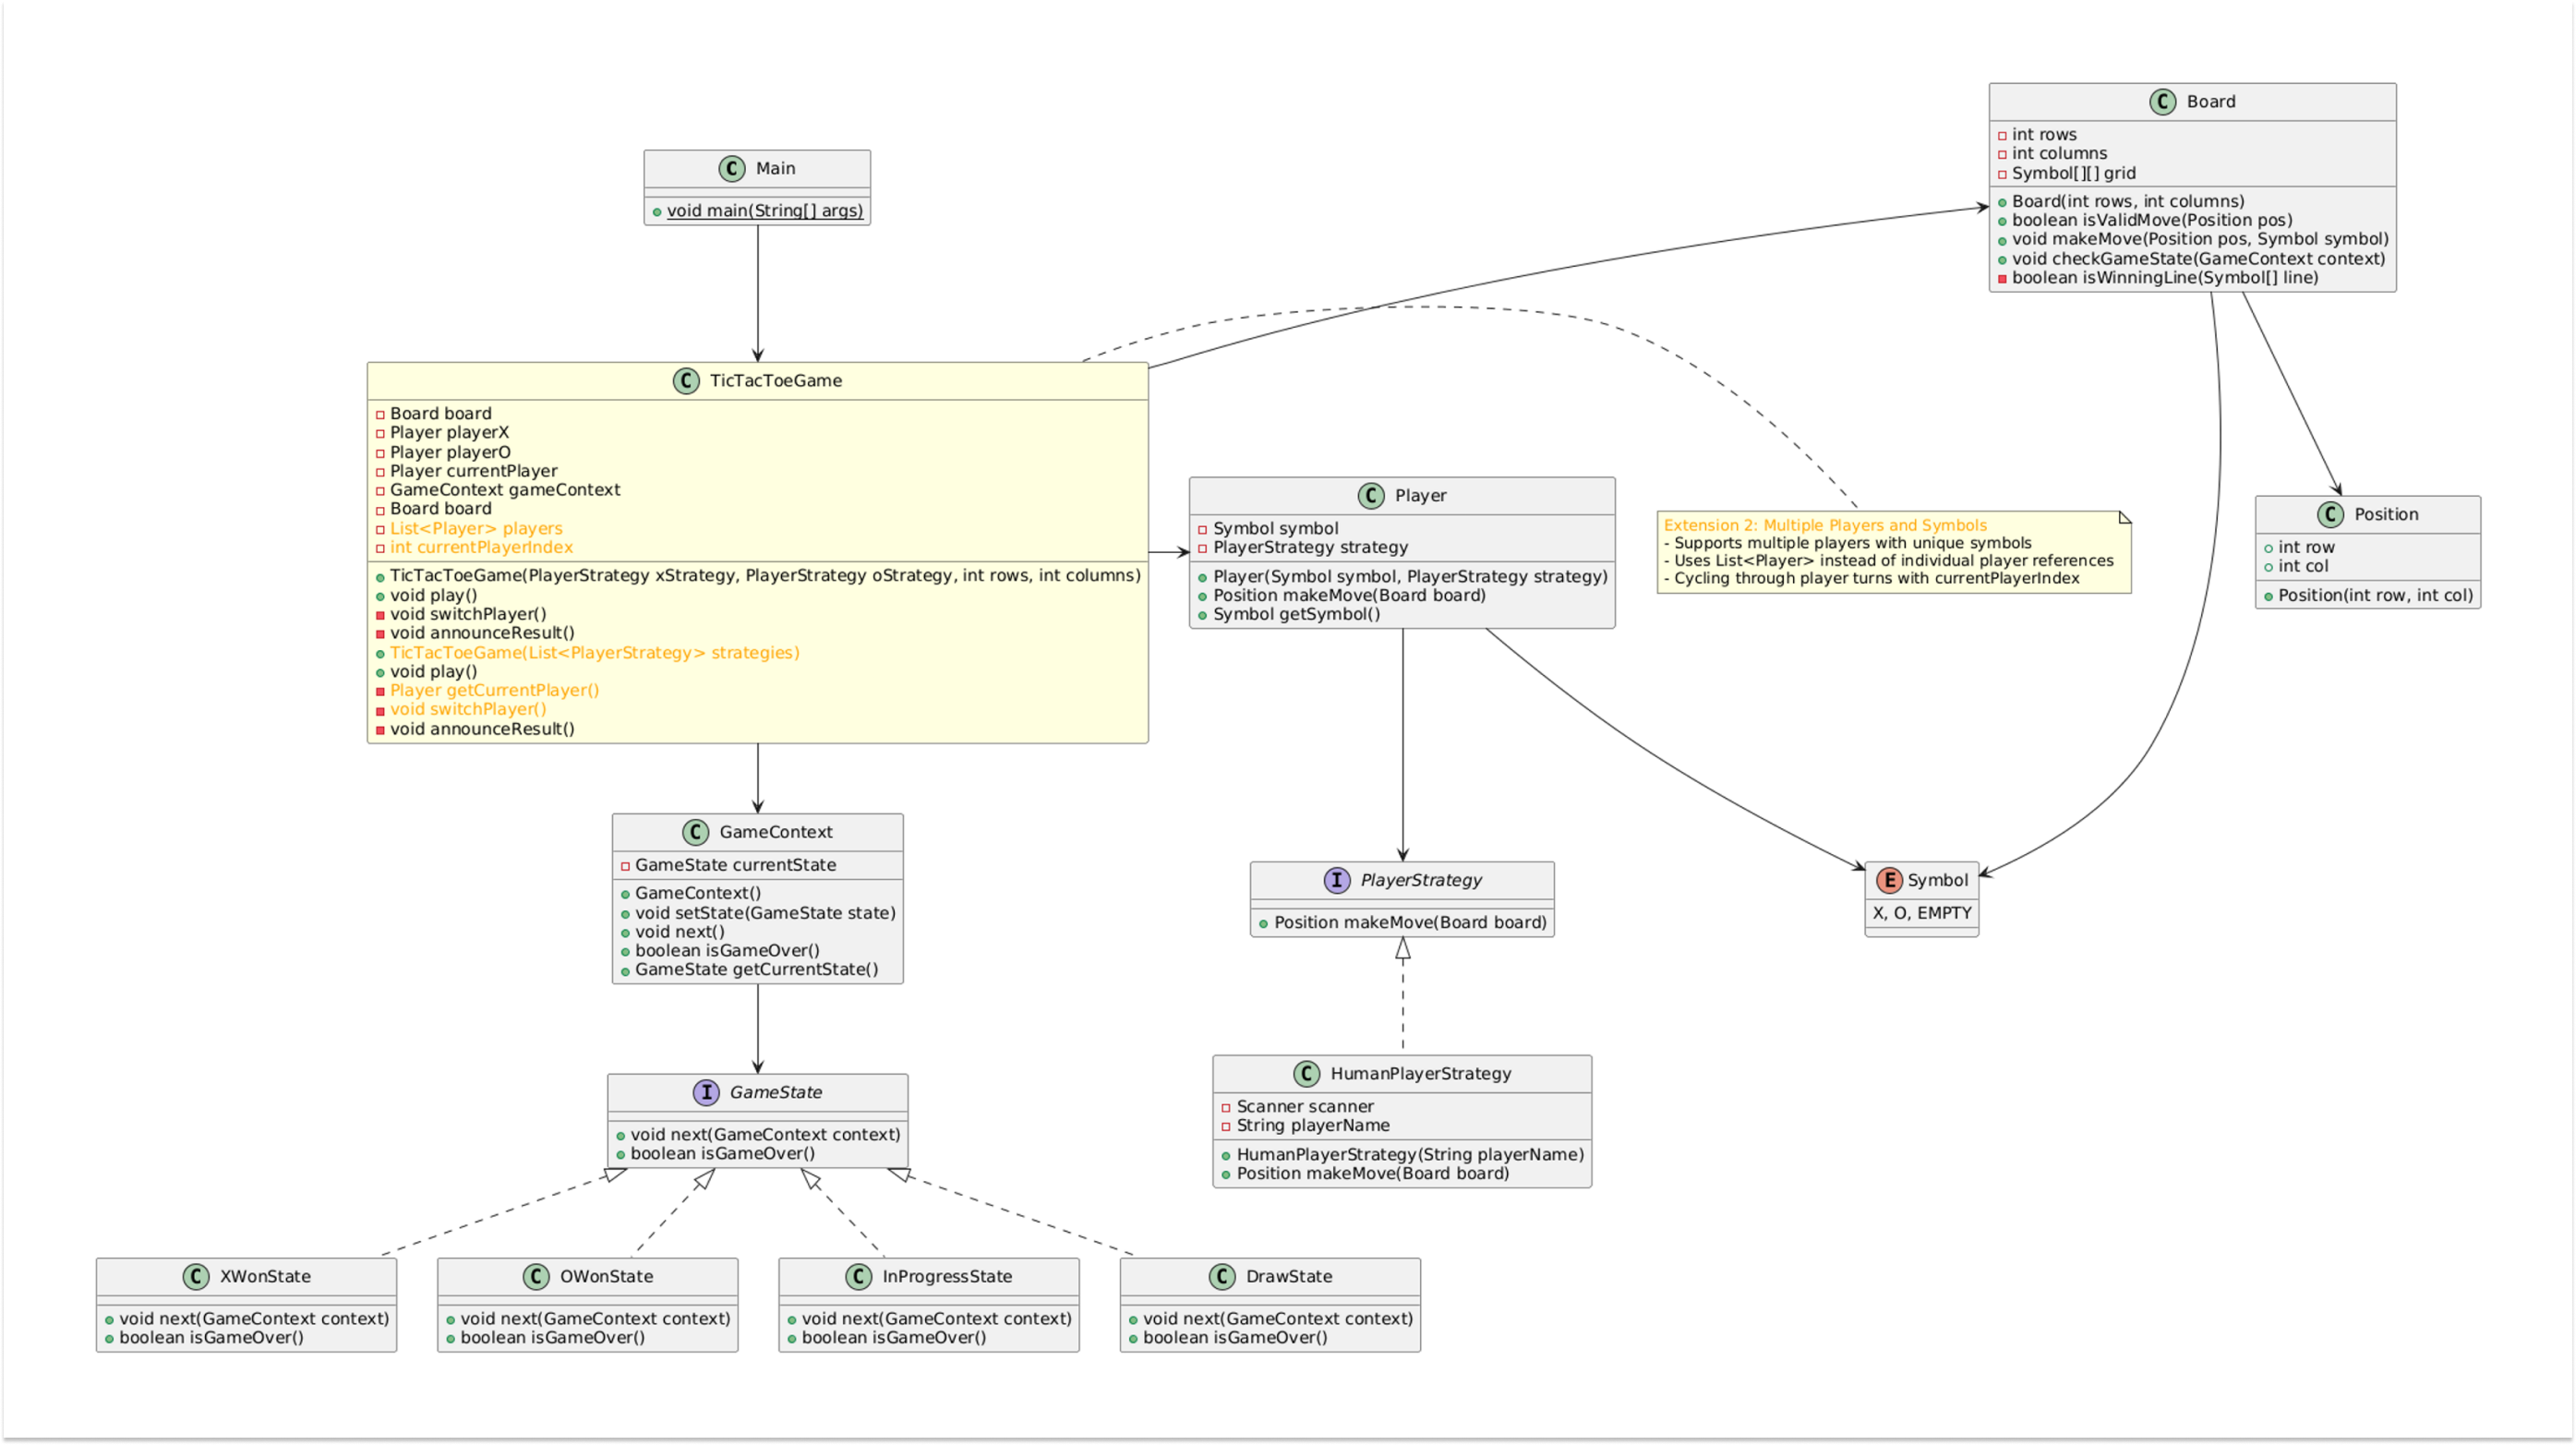

In [ ]:
class TicTacToeGame:

    def __init__(self, strategies: List[PlayerStrategy]):
        self.board = Board()
        self.players = list()
        self.players.append(Player(Symbol.X, strategies[0]))
        self.players.append(Player(Symbol.O, strategies[1]))
        self.currentPlayerIndex = 0

### Observer Pattern for Game Event Tracking
- Implement the observer pattern to notify users about each move, the current state of the game, and whose turn it is to play. This allows users to stay updated on game progress, receive notifications if they win or lose, and facilitates potential future extensions like logging and UI updates.
- 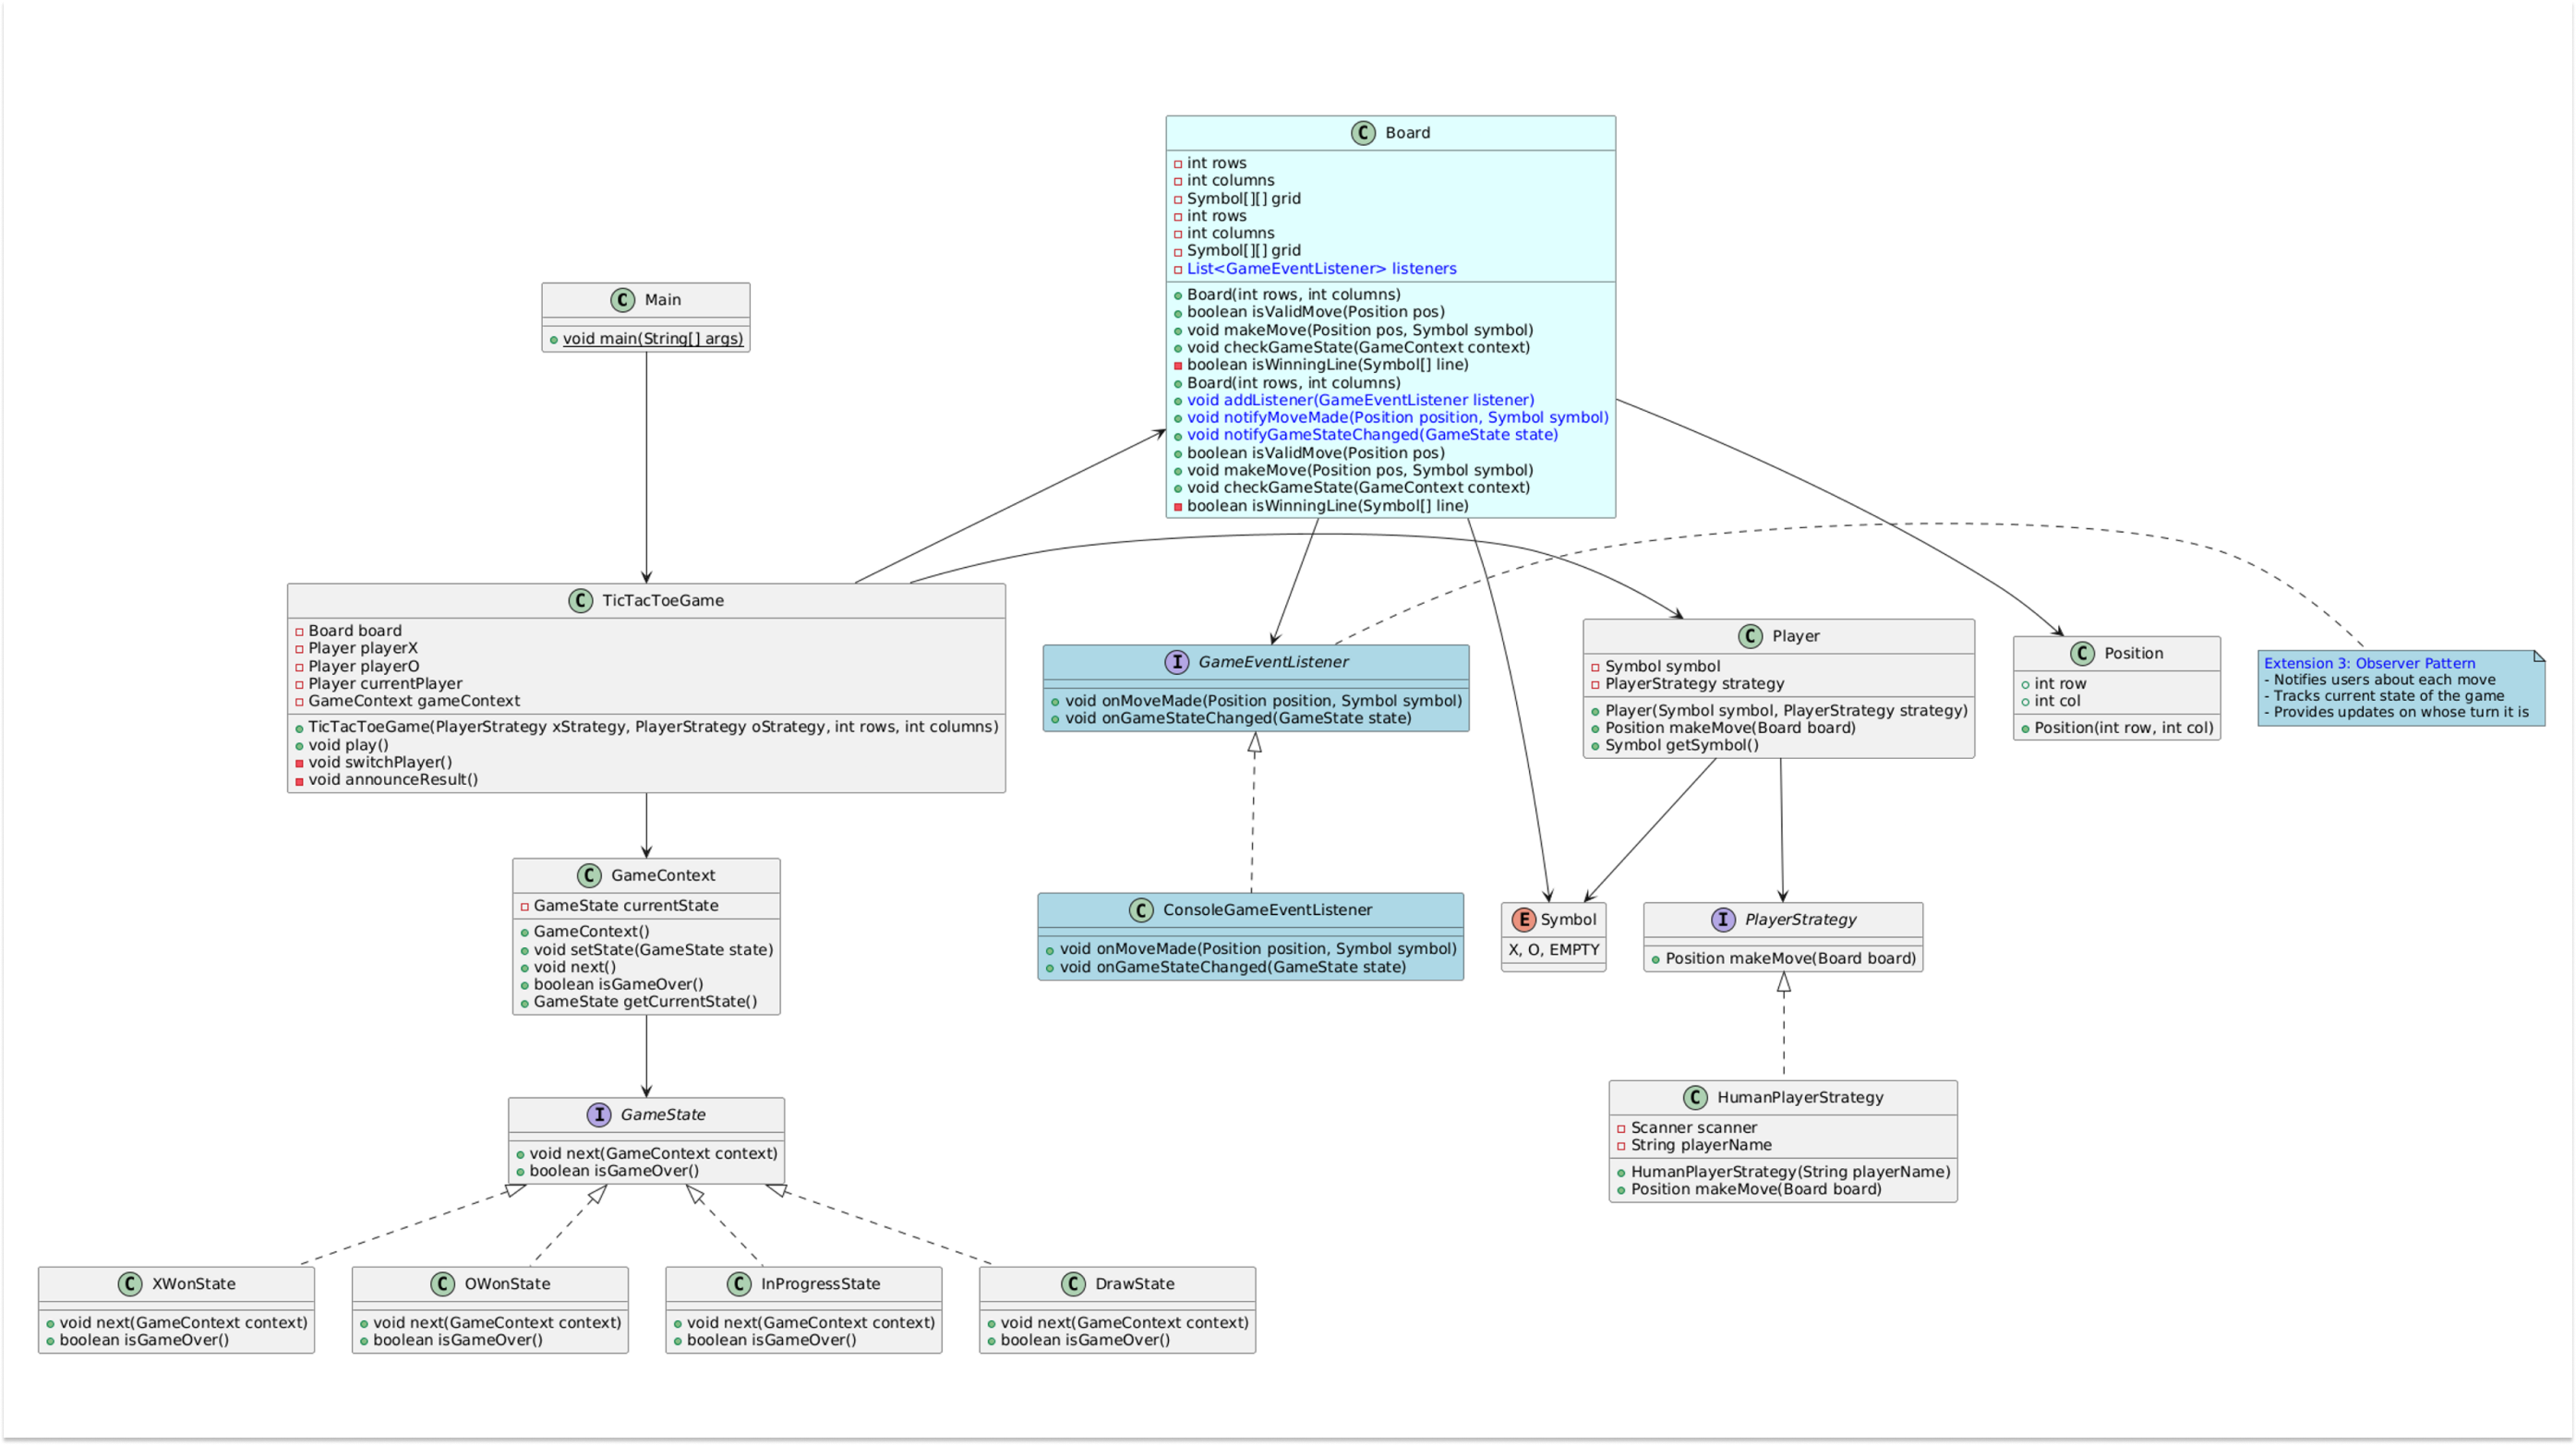

### Factory pattern for Player Creation
- Implement the factory pattern to create players with consistent intefaces, making it easy to add new players types and ensuring they adhere to the player interface. This allows for seamless intergation of human or AI players based on configuration.
- 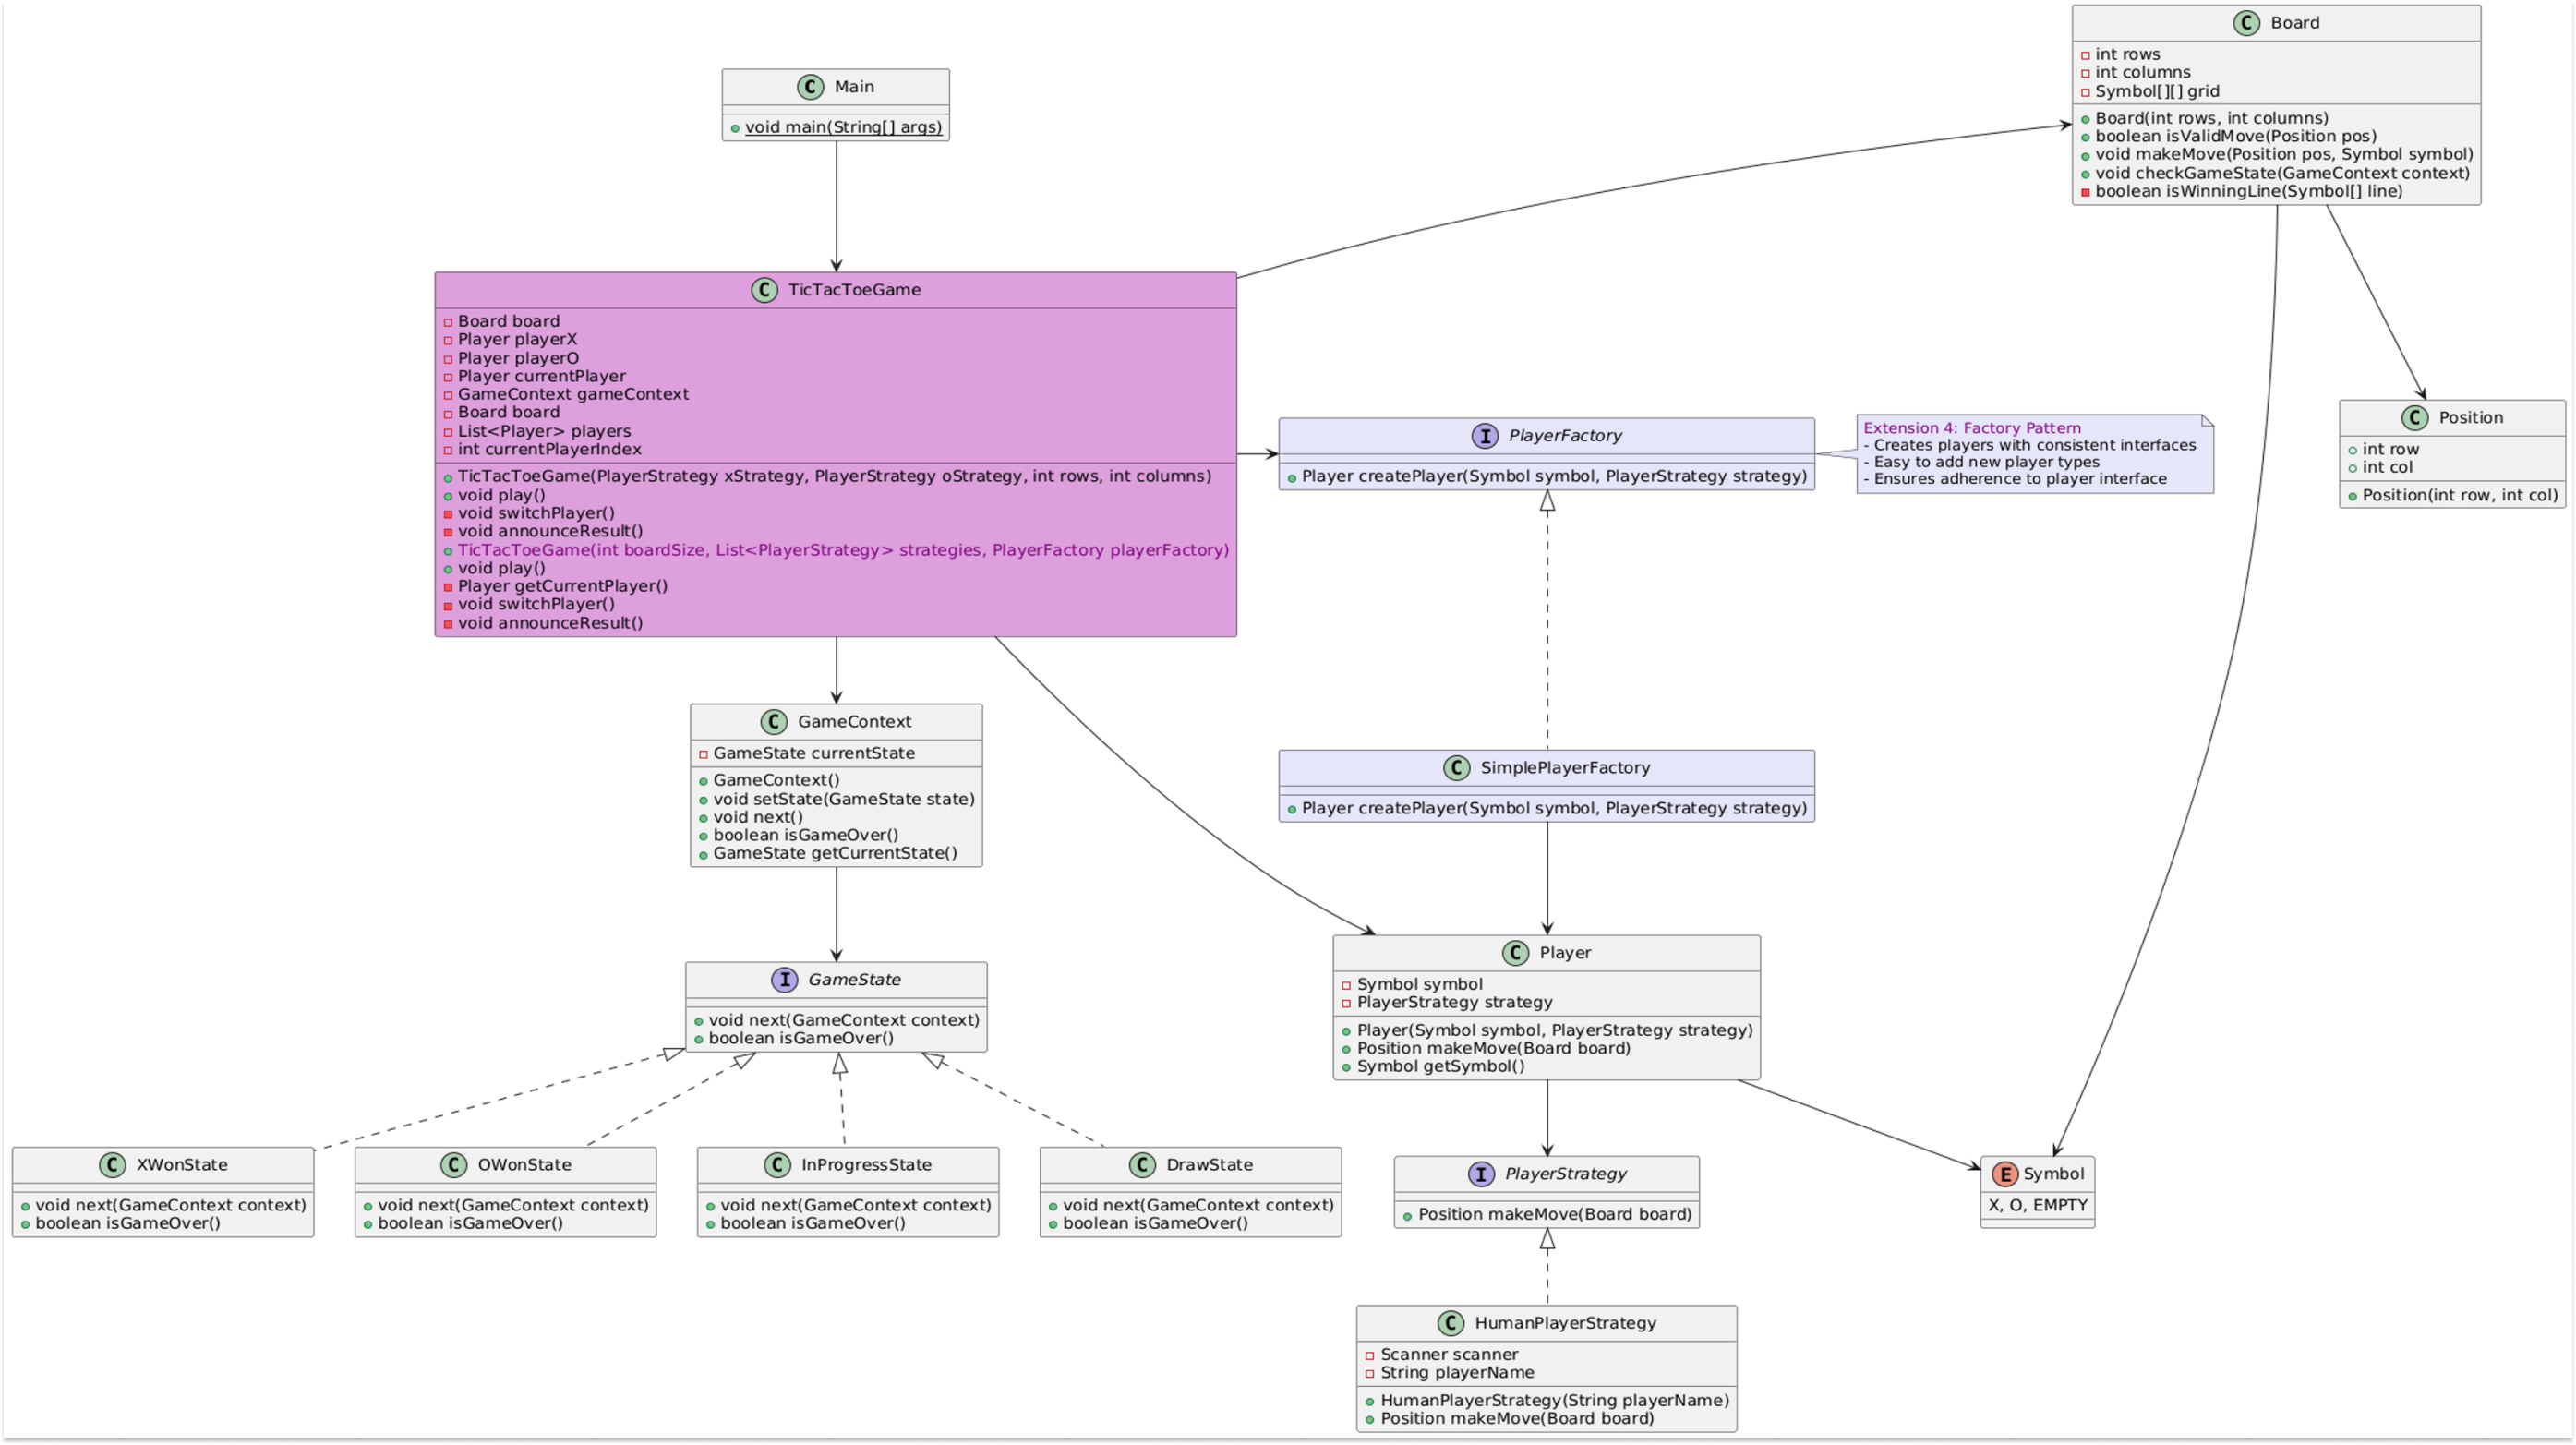

In [ ]:
# PlayerFactory Interface
class PlayerFactory(ABC):
    @abstractmethod
    def createPlayer(self, symbol: Symbol, strategy: PlayerStrategy):
        pass

# Concrete PlayerFactory Class
class SimplePlayerFactory(PlayerFactory):
    def createPlayer(self, symbol: Symbol, strategy: PlayerStrategy):
        return Player(symbol, strategy)

